#### Prepare DICOM Images for ML

In this exercices, you'll receivea small set of seven DICOM images, Here, rather than extracting the image itself from the DICOM file, we'll be extracting other attributes that tell us about the image and the patient who is represented in it.

To complete this exercice, create a single dataframe that thas the following columns 

- Patient ID
- Patient Age (as an integer)
- Patient Sex (M/F)
- Imaging Mordality
- Type of finding in the image
- Number of rows in the image
- Number of columns in the image

Print the contents of this dataframe

Note : When you see an attributes listed like "Patient's Age" for a DICOM, this can usually be extracted with pydicom by removing the spaces and special characters, like dcm.PatientAge

In [1]:
import pandas as pd
import numpy as np
import pydicom
import glob

In [2]:
## First, read all of my DICOM files into a list
mydicoms = glob.glob("*.dcm")

### Let's look at the contents of the first DICOM:

In [3]:
dcm1 = pydicom.dcmread(mydicoms[0])
dcm1

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.185126564350931428005573856598500696723485
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.185126564350931428005573856598500696723485
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'Infiltration|Nodule'
(0010, 002

In [4]:
dcm2 = pydicom.dcmread(mydicoms[1])
dcm2

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.128054799672057747174170862845625400966196
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.128054799672057747174170862845625400966196
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'Cardiomegaly|Effusion|Infiltrat

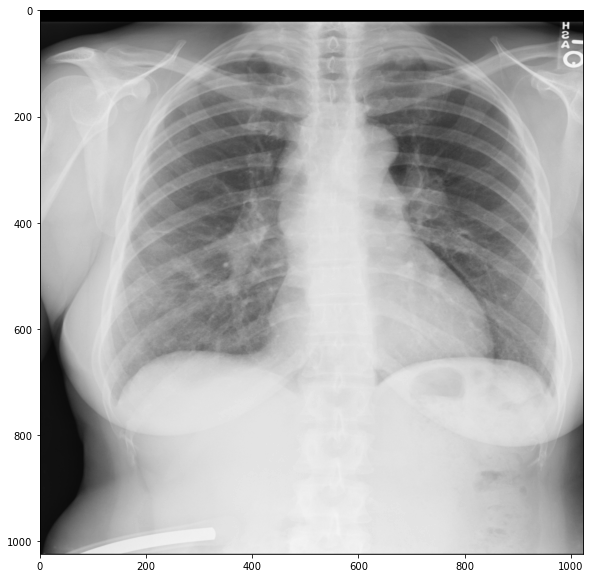

In [12]:
### Visualize these two dicom files 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(dcm1.pixel_array, cmap='gray')

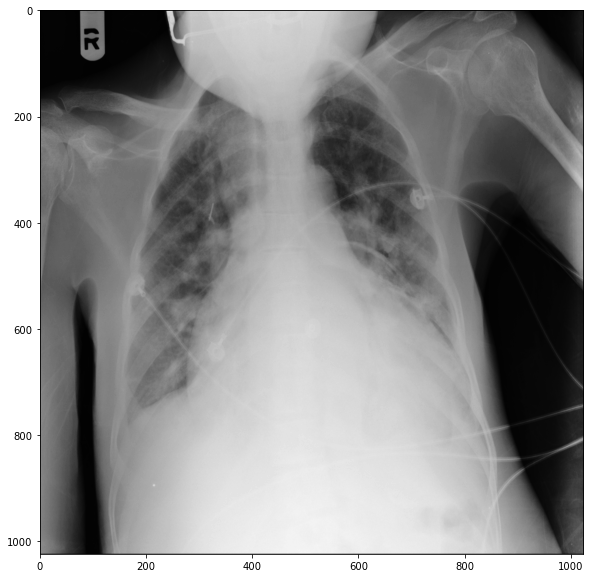

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(dcm2.pixel_array, cmap='gray')

In [ ]:
import pydicom as dicom
import pandas as pd

ds = dicom.read_file('path_to_file')
df = pd.DataFrame(ds.values())
df[0] = df[0].apply(lambda x: dicom.dataelem.DataElement_from_raw(x) if isinstance(x, dicom.dataelem.RawDataElement) else x)
df['name'] = df[0].apply(lambda x: x.name)
df['value'] = df[0].apply(lambda x: x.value)
df = df[['name', 'value']]

In [10]:
import pydicom as dicom
df_1=pd.DataFrame(dcm1.values())
df_1[0] = df_1.apply(lambda x: dicom.dataelem.DataElement_from_raw(x) if isinstance(x, dicom.dataelem.RawDataElement) else x)
df_1['name'] = df_1[0].apply(lambda x: x.name)
df_1['value'] = df_1[0].apply(lambda x: x.value)
df_1 = df_1[['name', 'value']]

In [11]:
df_1

,name,value
0,SOP Class UID,1.2.840.10008.5.1.4.1.1.7
1,SOP Instance UID,1.3.6.1.4.1.11129.5.5.185126564350931428005573...
2,Modality,DX
3,Study Description,Infiltration|Nodule
4,Patient ID,1688
5,Patient's Sex,F
6,Patient's Age,59
7,Study Instance UID,1.3.6.1.4.1.11129.5.5.111281257301391315034730...
8,Series Instance UID,1.3.6.1.4.1.11129.5.5.142777112548345374155789...
9,Samples per Pixel,1


In [ ]:
## Do some exploratory work before about how to extract these attributes using pydicom... 






##### 2nd Method 

Looking at the attributes listed above, I can see that I'm looking to extract the following attributes:

- Modality
- Study Description
- Patient ID
- Patient's Sex
- Patient's Age
- Rows
- Columns

In [14]:
dcm1.Modality

'DX'

In [15]:
dcm1.StudyDescription

'Infiltration|Nodule'

In [16]:
dcm1.PatientID

'1688'

In [17]:
dcm1.PatientSex

'F'

In [18]:
dcm1.PatientAge

'59'

In [19]:
dcm1.Rows

1024

In [20]:
dcm1.Columns

1024

## Now, let's create the dataframe that we want, and populate it in a loop with all of our DICOMS:

To complete this exercise, create a single dataframe that has the following columns:
- Patient ID
- Patient Age (as an integer)
- Patient Sex (M/F)
- Imaging Modality
- Type of finding in the image
- Number of rows in the image
- Number of columns in the image

Save this dataframe as a .CSV file.

In [21]:
all_data = []

for i in mydicoms: 
    dcm = pydicom.dcmread(i)
    fields = [dcm.PatientID, int(dcm.PatientAge), dcm.PatientSex, dcm.Modality, dcm.StudyDescription,
             dcm.Rows, dcm.Columns]
    all_data.append(fields)

In [22]:
mydata = pd.DataFrame(all_data, 
                      columns = ['PatientID','PatientAge','PatientSex','Modality','Findings','Rows','Columns'])


In [23]:
mydata

,PatientID,PatientAge,PatientSex,Modality,Findings,Rows,Columns
0,1688,59,F,DX,Infiltration|Nodule,1024,1024
1,5066,52,M,DX,Cardiomegaly|Effusion|Infiltration,1024,1024
2,23075,31,M,DX,Mass,1024,1024
3,13659,62,F,DX,Consolidation|Mass|Pneumonia|Pneumothorax,1024,1024
4,13118,69,M,DX,Atelectasis,1024,1024
5,10172,59,F,DX,Atelectasis|Effusion,1024,1024
6,29579,24,F,DX,Effusion|Nodule|Pleural_Thickening|Mass,1024,1024
